# <center><u> CP322: Assignment 2 – Winter 2026 </u> </center>
# <center><u>  Due on  February 8, 2026 (Before 11:59 PM) </u> </center>
 
 This is an individual assignment, and we will practice the concepts to build classification models, regularization and cross-validation. 
 
 For this assignment, you must use Python language. You will use this jupyter notebook to write your code without errors. If your code will not run, then you will score zero. Therefore, ensure you have removed all syntax errors from your code and not changing the variable names. Gradescope platform would be used to upload the assignments for grading and autograded question's feedback will be visible to you. The link to the Gradescope assignment is available on Myls course page. 
 
 For submission, drag and drop your code file(s) into Gradescope. Make sure that your file name should be as suggested in the assignment ("Assignment_2.ipynb"), using a different name may score zero.
 
 - Please note that the submitted code will be checked for plagiarism. By submitting this zip file, you would confirm that you have not received unauthorized assistance in preparing the assignment. You also confirm that you are aware of course policies for submitted work. 
 
 - Marks will be deducted from any questions where these requirements are not met.
 
 - Multiple attempts will be allowed, and only your last submission before the deadline will be graded. Instructor reserves the right to take off points for not following the directions.
 
<b>Warning:</b> Follow the assignment instructions to the letter in terms of the variable names and function names, as this assignment will be auto-graded. If anything is not as per the description, the auto-grading fails, and your assignment will be given a Zero mark.

Note: 
- For each question in the assignment, please write down your answer in the answer cell(s) right below the question. 
- It is helpful to have extra cells breaking down the process towards reaching your final answer. If you happen to create new cells below your answer to run codes, **NEVER** add cells between a question cell and the answer cell below it. It will cause errors when autograder run.
- Finally, unless it is stated otherwise, try to avoid using python for loops or list comprehensions.  The majority of this part of assignment can be done using builtin commands in Pandas, numpy, searborn, matplotlib, and sklearn.  

## Import the Python Packages

If any of the package is not available then install it.

In [152]:

%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [153]:
# Run this cell to suppress all FutureWarnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# for data manipulation
import pandas as pd, numpy as np, random
# Set a Random State value
RANDOM_STATE = 42
random.seed(RANDOM_STATE)
np.random.seed(RANDOM_STATE)

#for graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#models to run
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.preprocessing import LabelBinarizer


#train_test_split
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit, GridSearchCV

#for cycle
from itertools import cycle

#metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score, KFold

### Loading in the Data

Network intrusion detection (NID) is a method of protecting computer networks by identifying and preventing unauthorized access, misuse, modification, or denial of service. NID software monitors network traffic and looks for indicators of malicious activity, and can alert network administrators to suspicious activity and take action to block or isolate the source of the intrusion. In this assignment, we will create a network intrusion detection system, a predictive model that can differentiate between malicious connections, known as intrusions or attacks, and legitimate connections. The dataset used for building this model includes a diverse range of intrusions simulated in a military network setting.

In [154]:
# read raw data
train_data_original= pd.read_csv('https://raw.githubusercontent.com/sukhjitsehra/datasets/master/CP322/id/train.csv')
test_data_original = pd.read_csv('https://raw.githubusercontent.com/sukhjitsehra/datasets/master/CP322/id/test.csv')
test_data_original.columns = train_data_original.columns
train_data_original.label.value_counts().keys()
test_data_original.label.value_counts().keys()

Index(['smurf.', 'normal.', 'neptune.', 'snmpgetattack.', 'mailbomb.',
       'guess_passwd.', 'snmpguess.', 'satan.', 'warezmaster.', 'back.',
       'mscan.', 'apache2.', 'processtable.', 'saint.', 'portsweep.',
       'ipsweep.', 'httptunnel.', 'pod.', 'nmap.', 'buffer_overflow.',
       'multihop.', 'named.', 'sendmail.', 'ps.', 'xterm.', 'rootkit.',
       'teardrop.', 'xlock.', 'land.', 'xsnoop.', 'ftp_write.', 'phf.',
       'udpstorm.', 'perl.', 'loadmodule.', 'worm.', 'sqlattack.', 'imap.'],
      dtype='str', name='label')

In [155]:
train_data = train_data_original
test_data = test_data_original

### Question 1a
An important step in dealing with datasets is to clean the available data before using it for building models. Some important steps involved in the data cleaning process are removing/imputing NULL values, removing duplicates from the dataset and remove ". " from `labels` in the label column of both `train_data` and `test_data`.

First, let's check if our data contains any missing values. Fill in the cell below to print the number of NaN values in each column. If there are NaN values, replace them with appropriate filler values (i.e., NaN values should be replaced with 0 value). Print the number of NaN values in each column after this modification to verify that there are no NaN values left.


In [176]:
# print the count to null values
print('Before imputation:')
print(f"train data: \n {train_data.isnull().sum()}")
print(f"Test data: \n {test_data.isnull().sum()}")

# handle the null value by imputation
train_data = train_data.fillna(0)
test_data = test_data.fillna(0)
print('------------') 

# print the count if all null values are handled
print('After imputation:')
print(f"train data: \n {train_data.isnull().sum()}")
print(f"Test data: \n {test_data.isnull().sum()}")

# remove the '.' at the end of labels
train_data['label'] = train_data['label'].str.replace('.','')
test_data['label'] = test_data['label'].str.replace('.','')

Before imputation:
train data: 
 duration                       291172
protocol_type                  291172
service                        291172
flag                           291172
src_bytes                      291172
dst_bytes                      291172
land                           291172
wrong_fragment                 291172
urgent                         291172
hot                            291172
num_failed_logins              291172
logged_in                      291172
num_compromised                291172
root_shell                     291172
su_attempted                   291172
num_root                       291172
num_file_creations             291172
num_shells                     291172
num_access_files               291172
num_outbound_cmds              291172
is_host_login                  291172
is_guest_login                 291172
count                          291172
srv_count                      291172
serror_rate                    291172
srv_serror_rate  

### Question 1b

In the cell below,  drop the duplicate rows in out `train_data` and `test_data`. 


In [159]:
train_data = train_data.drop_duplicates()
test_data = test_data.drop_duplicates()


### Question 1c

Exploratory data analysis (EDA) is an approach for analyzing the dataset to summarize their main characteristics, often with visual methods. A statistical model may or may not be used, but primarily EDA is for seeing what the data can tell us beyond the formal modeling.

Now, create a plot of distribution of labels from `train_data` in the following code chunk and also write down the at least two observations about the dataset.


_Type your answer here, replacing this text._

<!-- BEGIN QUESTION -->



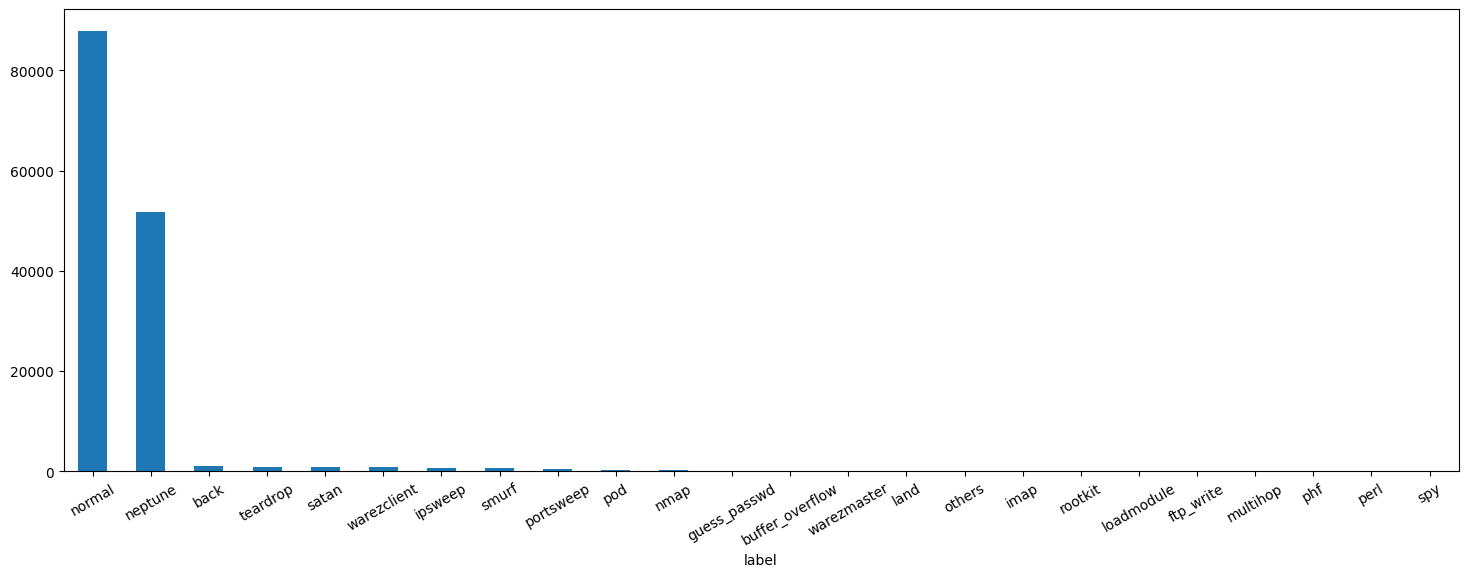

In [160]:
sns.set_color_codes()
fig, ax1 = plt.subplots(1,1, figsize = (18,6))
train_data['label'].value_counts().plot(kind='bar')
plt.xticks(rotation=30)
plt.draw()

<!-- END QUESTION -->



### Question 1d

For multinomial classification, we combine some of labels into attack_type, as given below: 

Convert labels into attack_types.

1. ['back', 'land', 'neptune', 'pod', 'smurf', 'teardrop'] -> 'dos'
2. ['buffer_overflow', 'loadmodule','perl', 'rootkit'] -> 'utr'
3. ['Ftp_write', 'guess_passwd', 'imap', 'multihop', 'phf', 'spy','warezclient', 'warezmaster'] -> 'rtl'
4. ['satan', 'ipsweep', 'nmap', 'portsweep'] -> 'probes'

Complete the following function to group the labels, and update both `train_data` and `test_data`.


In [161]:
# combining labels 
def label_grouping(label):
    dos = ['back', 'land', 'neptune', 'pod', 'smurf', 'teardrop']
    utr = ['buffer_overflow', 'loadmodule','perl', 'rootkit']
    rtl = ['Ftp_write', 'guess_passwd', 'imap', 'multihop', 'phf', 'spy','warezclient', 'warezmaster']
    probes = ['satan', 'ipsweep', 'nmap', 'portsweep']

    """Group the label together. Returns new label."""
    if label in dos:
        return 'dos'
    elif label in utr:
        return 'utr'
    elif label in rtl:
        return 'rtl'
    elif label in probes:
        return 'probes'
    elif label == 'normal':
        return 'normal'
    else:
        return 'others'

# Update the data 
train_data['label_attack_type']= train_data['label'].apply(label_grouping)
test_data['label_attack_type']= test_data['label'].apply(label_grouping)


### Question 1e 

Explore the data graphically in order to investigate the distribution of variables with other features from `train_data`. Describe your findings, while creating the following:

a) Bar plot of distribution of attack-type labels (normal, dos, utr, rtl, probes).

b) Distribution of features:
    
    1. Categorical features : Use `sns.countplot` to understand prominent values of a feature in each class.
    
    2. Continuous features : Use `sns.boxplot` to understand distribution of a feature in each class.


<!-- BEGIN QUESTION -->



(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'normal'),
  Text(1, 0, 'dos'),
  Text(2, 0, 'probes'),
  Text(3, 0, 'rtl'),
  Text(4, 0, 'utr'),
  Text(5, 0, 'others')])

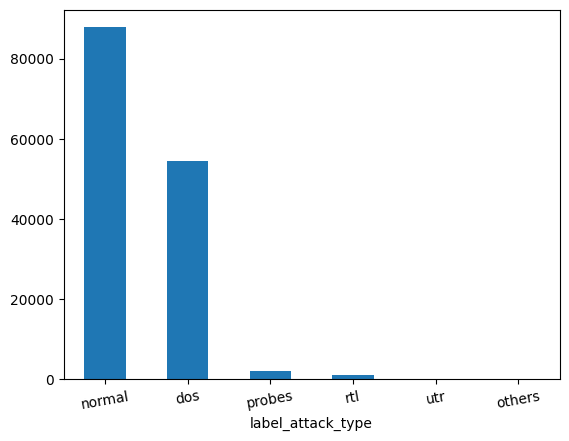

In [162]:
# a) distribution of label_attack_type

train_data['label_attack_type'].value_counts().plot(kind='bar')
#fig, ax1 = plt.subplots(1,1, figsize = (18,6))


plt.xticks(rotation=10)

In [163]:
train_data.dtypes

duration                         int64
protocol_type                      str
service                            str
flag                               str
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                            float64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

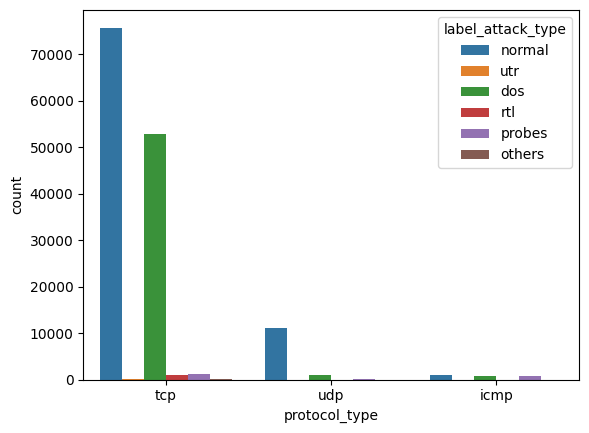

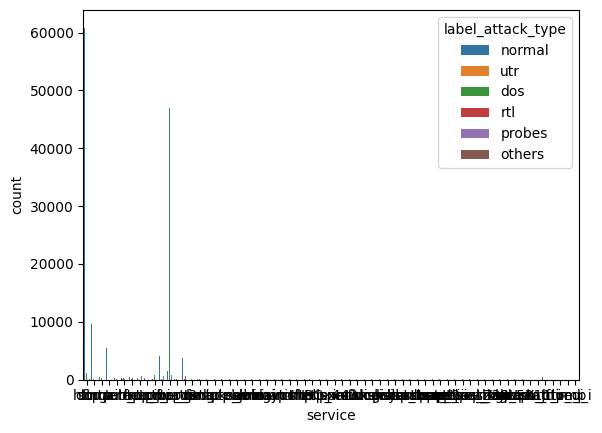

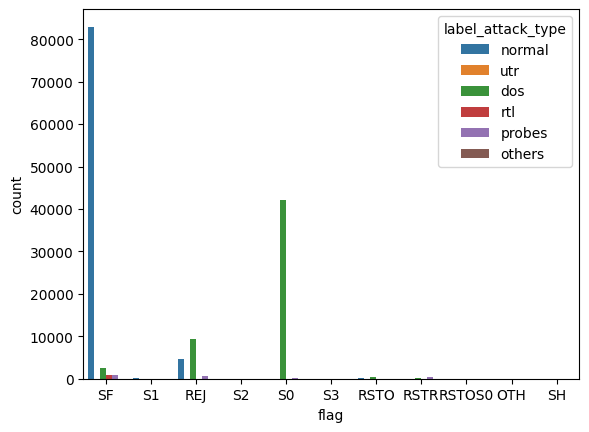

In [164]:
#b i) distribution of categorical variables with 'label_attack_type'
categorical_cols = ['protocol_type','service','flag']

for col in categorical_cols:
    plt.figure()
    sns.countplot(
        data=train_data,
        x=col,
        hue='label_attack_type'
    )
    

C:\Users\Keenan\AppData\Local\Temp\ipykernel_19320\4115550738.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


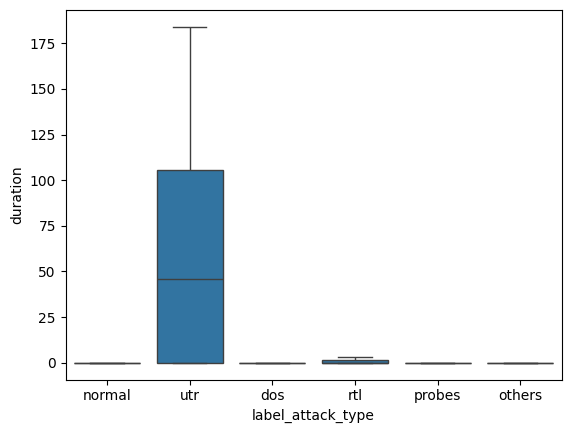

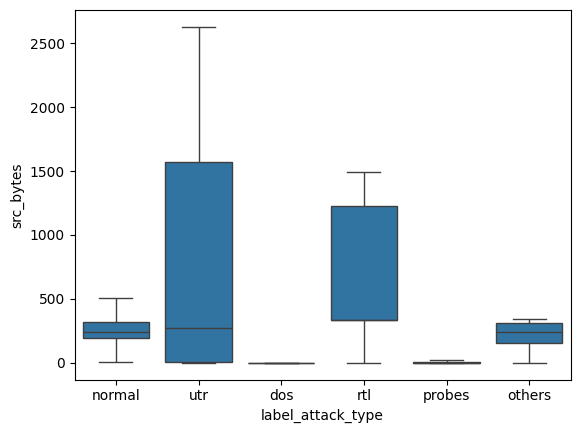

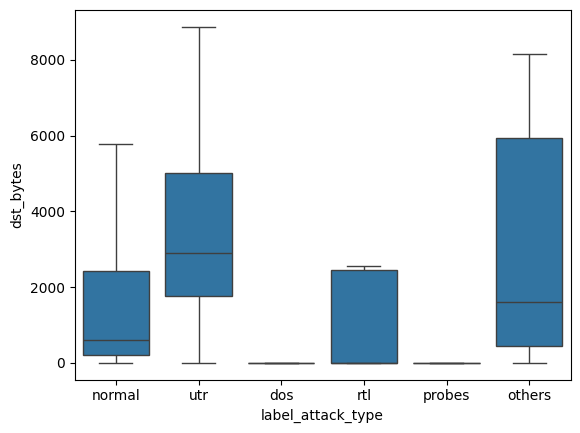

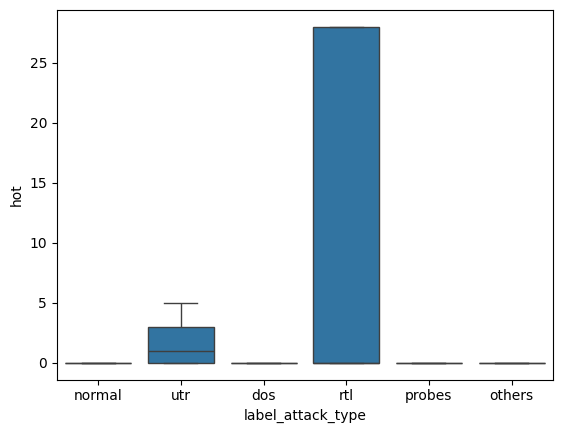

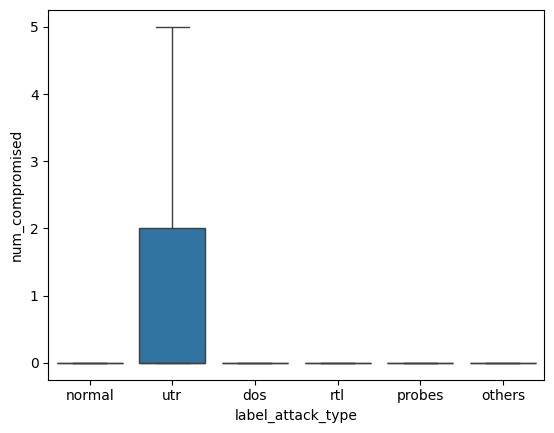

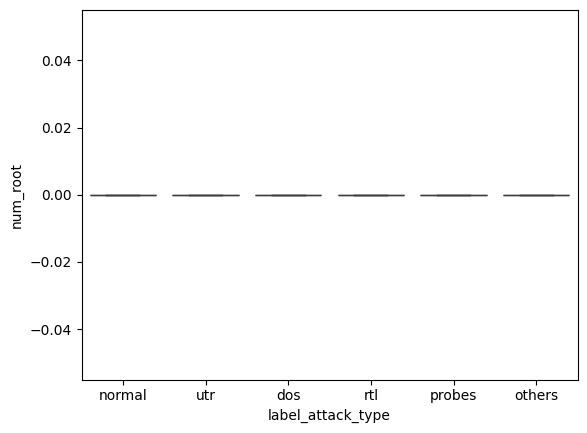

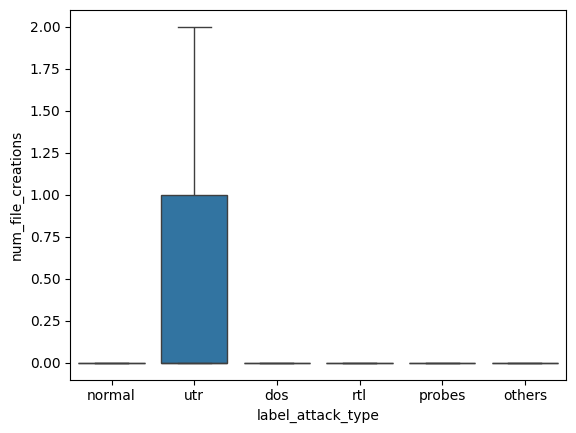

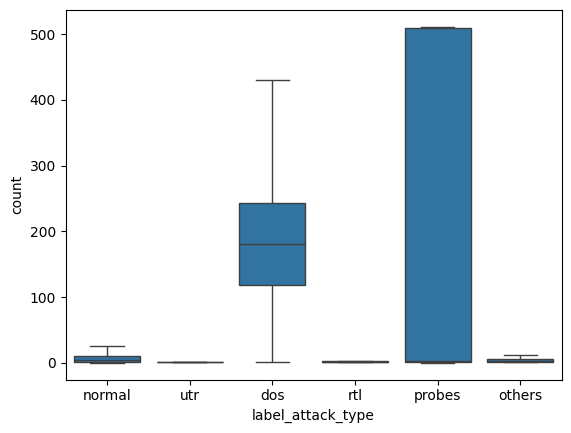

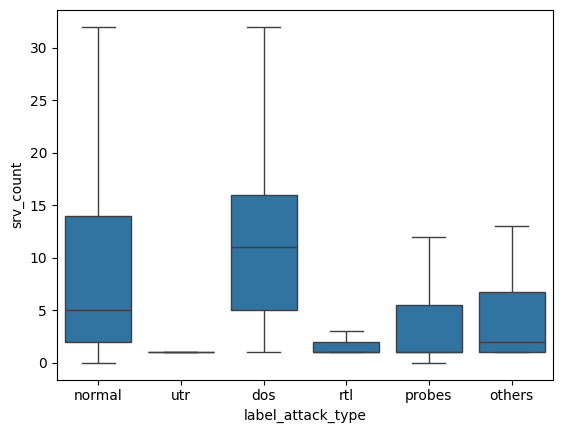

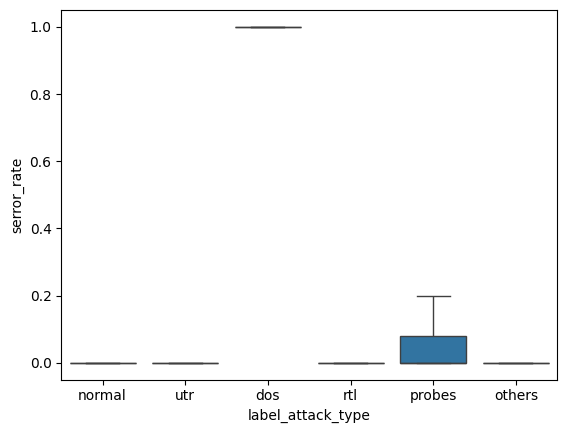

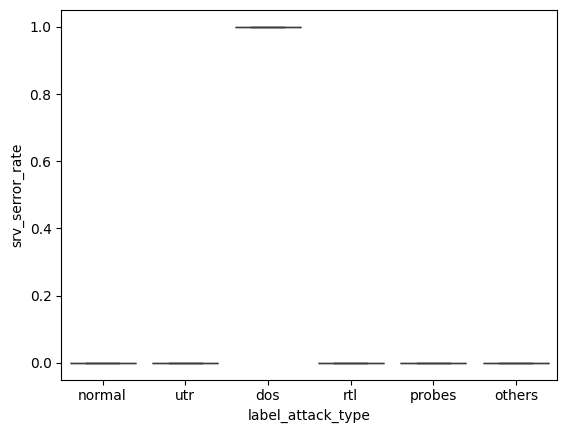

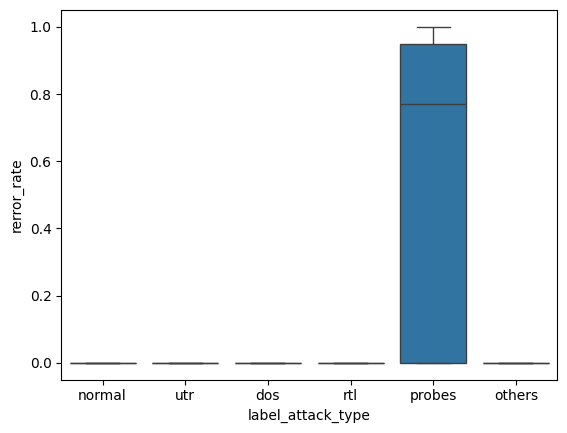

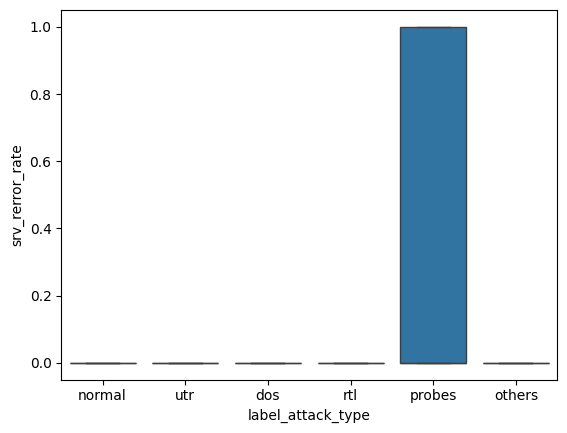

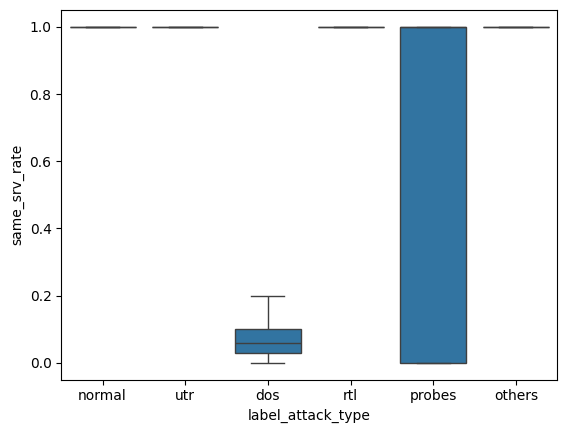

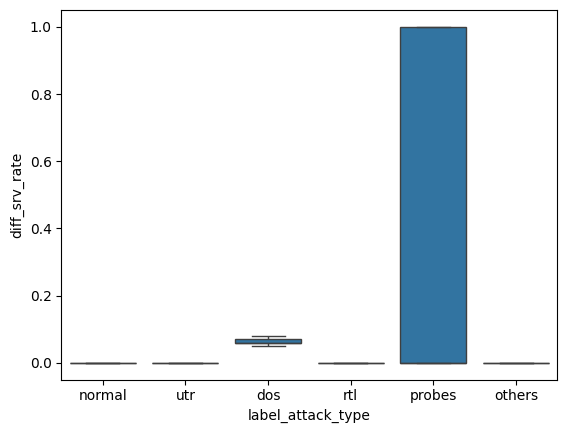

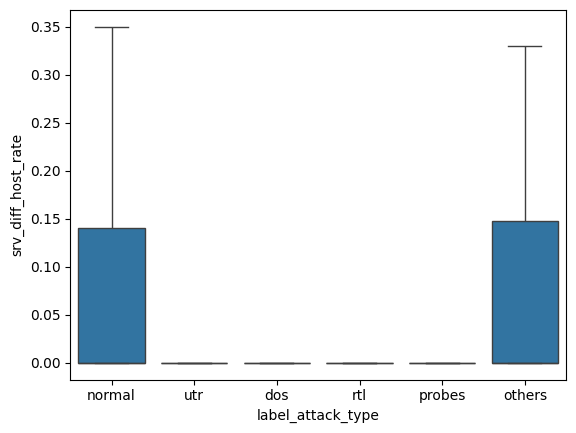

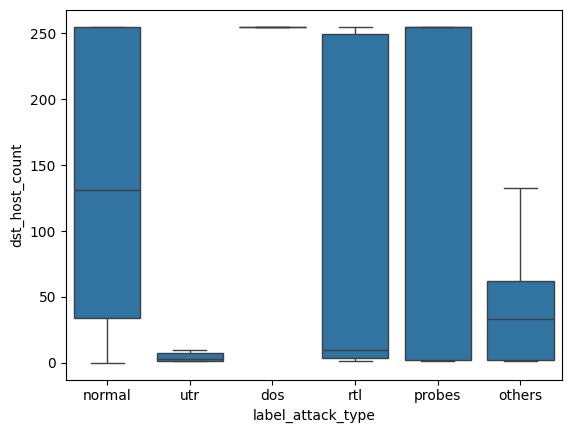

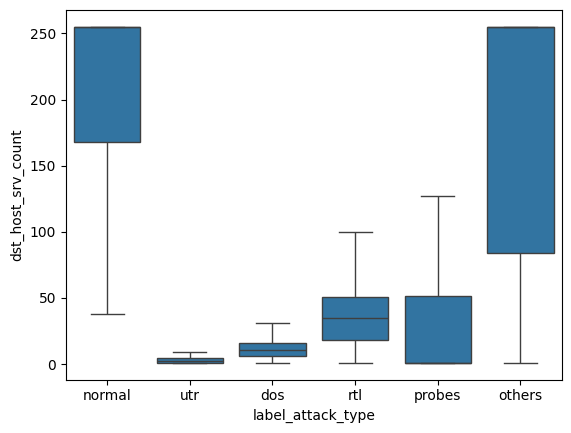

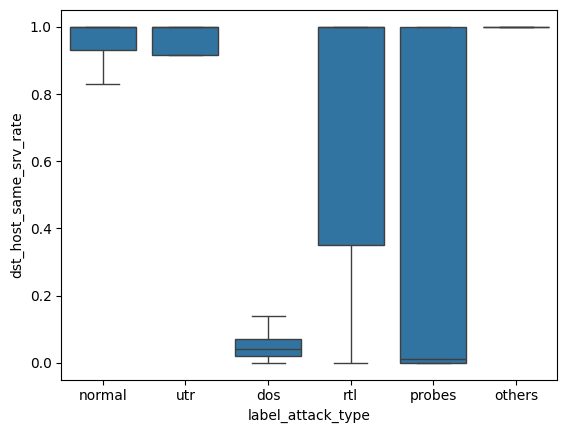

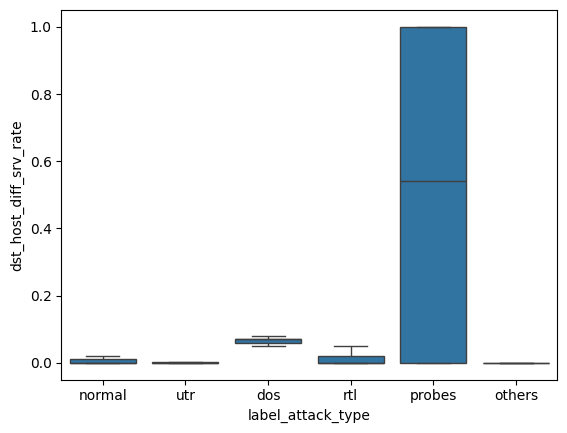

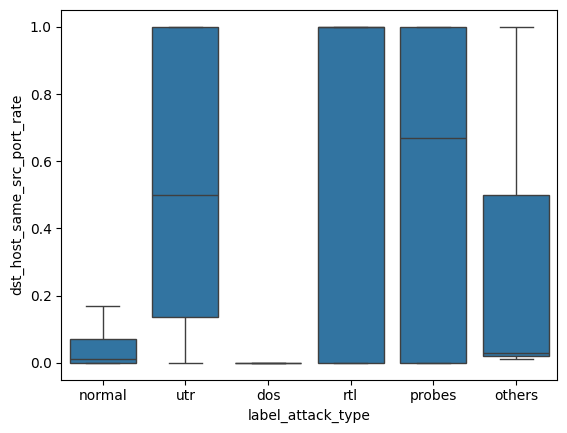

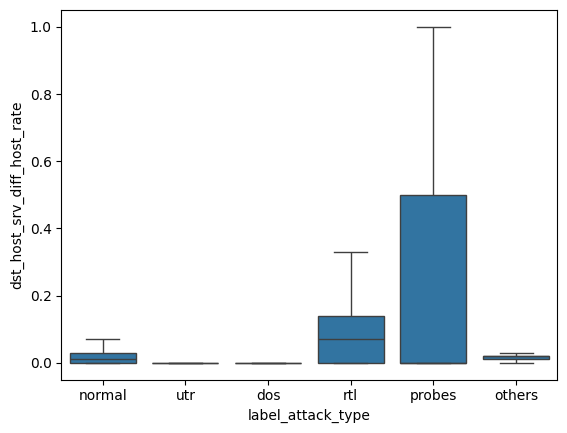

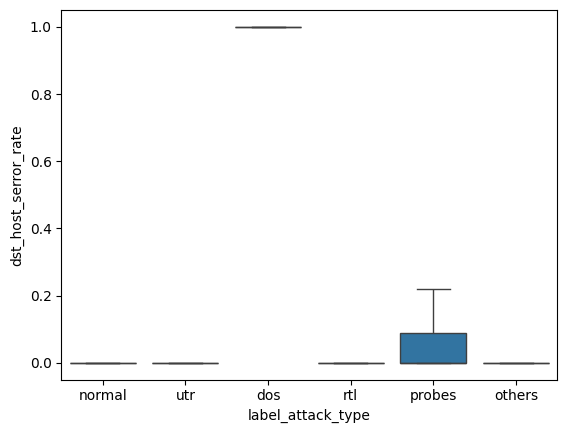

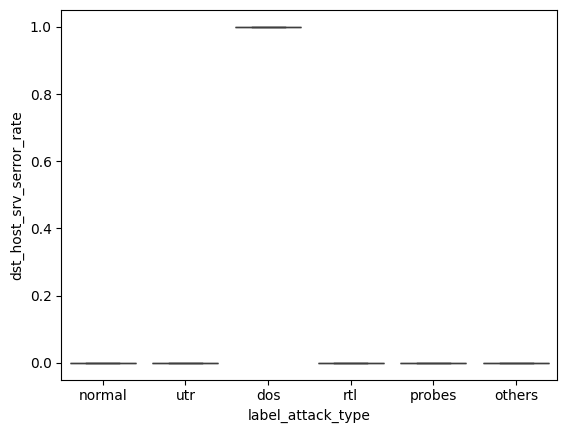

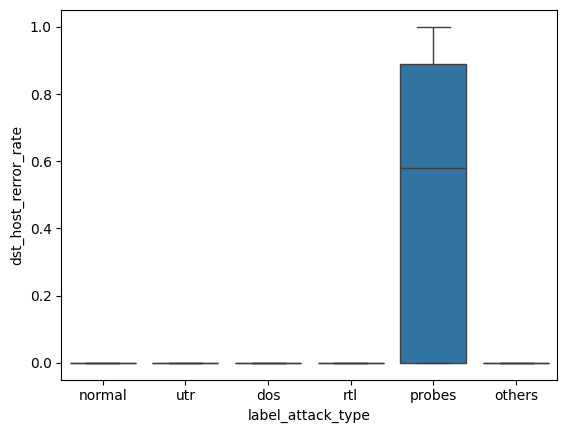

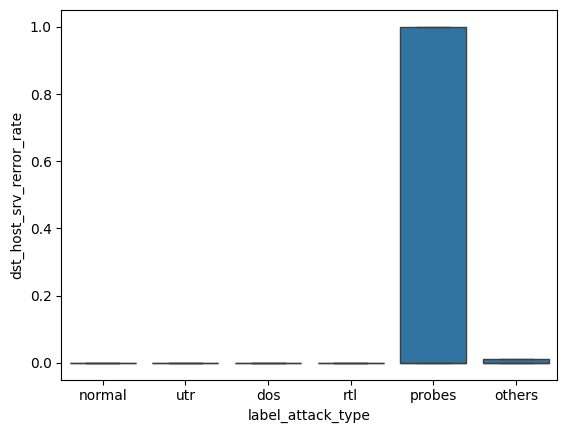

In [165]:
#b ii) 
temp = train_data.copy()


for column in train_data.columns:
    if train_data[column].dtype in ['int64','float64']:
        if column != 'label_attack_type' and train_data[column].nunique() > 15:
            #temp = train_data.copy()
            #temp[column]=np.log1p(temp[column])
            plt.figure()
            ax = sns.boxplot(
                data=train_data,
                x='label_attack_type',
                y=column,
                showfliers=False
                
            

            )
            
        ...

<!-- END QUESTION -->

## Question 2a

a) Complete the function to convert data labels to numerical values, e.g. dos=1, utr=2, rtl=3, probes=4, normal=0, and update both `train_data` and `test_data` by creating a new column `label_encoding`.


In [166]:
train_data['label'].value_counts().head(20)

label
normal             87814
neptune            51820
back                 968
teardrop             918
satan                906
warezclient          893
ipsweep              651
smurf                641
portsweep            416
pod                  206
nmap                 158
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  19
others                18
imap                  12
rootkit               10
loadmodule             9
ftp_write              8
Name: count, dtype: int64

In [167]:
def get_label_encoding(label):
    """Create numeric labels. Return the label."""
    if label == 'dos':
        return 1
    elif label == 'utr':
        return 2
    elif label == 'rtl':
        return 3
    elif label == 'probes':
        return 4
    elif label == 'others':
        return 5
    else:
        return 0

train_data['label_encoding']= train_data['label_attack_type'].apply(get_label_encoding)
test_data['label_encoding']= test_data['label_attack_type'].apply(get_label_encoding)

## Question 2b

Perform one-hot encoding of categorical features in the `flag` and `protocol_type` categorical variables for both `train_data` and `test_data`. 


In [168]:
#one hot encoding of categorical variables using get_dummies function and add prefix = 'prefix = 'flag'
flag_encoding_test = pd.get_dummies(test_data['flag'],prefix='flag')

#one hot encoding of categorical variables using get_dummies function and add prefix = 'protocol' 
protocol_encoding_test = pd.get_dummies(test_data['protocol_type'], prefix='protocol')

# concat the dummies with original dataframe
#maybe drop old flag and protocol later
test_data = pd.concat([test_data, flag_encoding_test, protocol_encoding_test])

#one hot encoding of categorical variables
flag_encoding_train = pd.get_dummies(train_data['flag'],prefix='flag')
protocol_encoding_train = pd.get_dummies(train_data['protocol_type'],prefix='protocol')

# concat with original dataframe
train_data = pd.concat([train_data, flag_encoding_train, protocol_encoding_train])

## Question 2c

Separate the predictors and target variables in `train_data` and `test_data` datasets, our target variable is `label_encoding` and predictors except the following:

    'label', 'label_attack_type', 'index', 'protocol_type','flag','service','is_host_login','label_encoding','count','same_srv_rate','diff_srv_rate','src_bytes','flag_SF', 'dst_host_same_srv_rate','dst_host_srv_count','dst_bytes','dst_host_srv_serror_rate','dst_host_diff_srv_rate','dst_host_serror_rate','srv_serror_rate','flag_S0','serror_rate','logged_in','dst_host_same_src_port_rate','dst_host_count'

Note: Drop the unwanted columns from the `train_data` and `test_data` and create variables `X_train, y_train, X_test, y_test`. Make, you are not making any changes to the datasets.



In [180]:
train_data.isna().sum()

duration                            0
protocol_type                       0
service                             0
flag                                0
src_bytes                           0
dst_bytes                           0
land                                0
wrong_fragment                      0
urgent                              0
hot                                 0
num_failed_logins                   0
logged_in                           0
num_compromised                     0
root_shell                          0
su_attempted                        0
num_root                            0
num_file_creations                  0
num_shells                          0
num_access_files                    0
num_outbound_cmds                   0
is_host_login                       0
is_guest_login                      0
count                               0
srv_count                           0
serror_rate                         0
srv_serror_rate                     0
rerror_rate 

In [181]:
# select the required predictors and remove unwanted.
exclude = ['label', 'label_attack_type', 'protocol_type','flag','service','is_host_login','label_encoding','count','same_srv_rate','diff_srv_rate','src_bytes','flag_SF', 'dst_host_same_srv_rate','dst_host_srv_count','dst_bytes','dst_host_srv_serror_rate','dst_host_diff_srv_rate','dst_host_serror_rate','srv_serror_rate','flag_S0','serror_rate','logged_in','dst_host_same_src_port_rate','dst_host_count']
X_train = train_data.drop(columns=exclude)
y_train = train_data['label_encoding']
X_test = test_data.drop(columns=exclude)
y_test = test_data['label_encoding']

In [182]:
np.unique(y_train)

array([0., 1., 2., 3., 4., 5.])

### Evaluating Classifiers


We have discussed that evaluating accuracy on the training set may provide a misleading measure alone. Accuracy on the training set doesn't always translate to accuracy in the real world (on the test set). In future parts of this analysis, we will hold out some of our data for model validation and comparison.

False positives and false negatives may be of differing importance, leading us to consider more ways of evaluating a classifier, in addition to overall accuracy:

- **Precision**: $\frac{\text{TP}}{\text{TP} + \text{FP}}$

- **Recall**: $\frac{\text{TP}}{\text{TP} + \text{FN}}$ 

- **False-alarm rate**: $\frac{\text{FP}}{\text{FP} + \text{TN}}$

The two graphics below may help you understand precision and recall visually:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/700px-Precisionrecall.svg.png" width="500px">

## Question 2d

Write evaluation function to calculate accuracy, precision, recall, f1 score, kappa, confusion matrix. Call it ```get_performance_metrics(y_test, model_predictions, model_predictions_probability)```.

Note: you can use functions from sklearn.metrics for this question.


In [209]:
def get_performance_metrics(y_test, model_predictions, model_predictions_probability):
    """Calculate accuracy, precision, recall, f1-score, and kappa score. Returns: Dictionary of parameters""" 
    model_accuracy = accuracy_score(y_test, model_predictions)
    model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_test, model_predictions, zero_division=0)
    model_kappa = metrics.cohen_kappa_score(y_test, model_predictions)

    # Confusion matrix
    model_confusion_matrix = confusion_matrix(y_test, model_predictions)
    

    # Return as dictionary
    return {'Model_Accuracy': model_accuracy, 'Model_Precision': model_precision, 'Model_Recall': model_recall, 'Model_F1_Score': model_f1, \
         'Model_Kappa': model_kappa, 'Confusion_Matrix': model_confusion_matrix}

## Building the Models

## Question 3a

Complete a function in the code chunk below to fit classification models and its take `model_name, X_train, y_train, X_test` as input parameters and return back the predictions and prediction probabilities. Using this function:

 a) Fit LDA on the training data using the predictor variables in (X_train) dataset to predict the `label` class (i.e. using X_test data). 
 
 b) Fit QDA on the training data using the predictor variables in (X_train) dataset to predict the `label` class (i.e. using X_test data).  

 c) Fit logistic regression on the training data using the predictor variables in (X_train) dataset to predict the `label` class (i.e. using X_test data). 

 d) Fit naive Bayes on the training data using the predictor variables in (X_train) dataset to predict the `label` class (i.e. using X_test data). 

 e) Fit KNN on the training data, with K = 5, using the predictor variables in (X_train) dataset to predict the `label` class (i.e. using X_test data). 

 f) Fit a decision tree on the training data using the predictor variables in (X_train) dataset to predict the `label` class (i.e. using X_test data). 

Note: Remember to random_state = 42 or constant RANDOM_STATE for results reproducibility. 

In [210]:
def model_fit(model, X_train, y_train, X_test):
    """Fit classification model using sklearn library. Returns: model predictions and probabilities"""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    return y_pred, y_pred_proba

In [211]:
#a)
fit_lda = LinearDiscriminantAnalysis(solver='svd')
y_pred_lda, y_pred_proba_lda = model_fit(fit_lda, X_train, y_train, X_test)
print(f"y_pred_lda: {y_pred_lda} \n y_pred_proba_lda: {y_pred_proba_lda}")
print(np.bincount(y_train.astype(int)))
print(print(np.bincount(y_test.astype(int))))

y_pred_lda: [0. 0. 0. ... 0. 0. 0.] 
 y_pred_proba_lda: [[9.15335080e-01 8.46649197e-02 0.00000000e+00 1.17024655e-40
  9.58057207e-12 2.26433086e-98]
 [9.12703790e-01 8.72962104e-02 0.00000000e+00 1.16085674e-40
  9.64973640e-12 2.25633216e-98]
 [9.12703790e-01 8.72962104e-02 0.00000000e+00 1.16085674e-40
  9.64973640e-12 2.25633216e-98]
 ...
 [9.88491863e-01 1.15081375e-02 0.00000000e+00 4.88038998e-41
  1.10779604e-11 7.70054506e-99]
 [9.88491863e-01 1.15081375e-02 0.00000000e+00 4.88038998e-41
  1.10779604e-11 7.70054506e-99]
 [9.88491863e-01 1.15081375e-02 0.00000000e+00 4.88038998e-41
  1.10779604e-11 7.70054506e-99]]
[378986  54572     52    991   2131     26]
[202495  21720     39   2325   1269   4025]
None


In [212]:
#b) 
fit_qda = QuadraticDiscriminantAnalysis(solver='eigen', shrinkage=0.1)
y_pred_qda, y_pred_proba_qda = model_fit(fit_qda, X_train, y_train, X_test)

print(f"y_pred_qda: {y_pred_qda}\ny_pred_proba_qda: {y_pred_proba_qda}")


y_pred_qda: [5. 5. 5. ... 5. 5. 5.]
y_pred_proba_qda: [[3.01414060e-41 1.75883324e-01 1.93133089e-20 2.82298860e-62
  2.52888718e-74 8.24116676e-01]
 [2.76976843e-41 1.62952672e-01 1.76897298e-20 2.59184790e-62
  2.32187129e-74 8.37047328e-01]
 [2.76976843e-41 1.62952672e-01 1.76897298e-20 2.59184790e-62
  2.32187129e-74 8.37047328e-01]
 ...
 [3.96949660e-41 2.07594157e-01 2.46534736e-20 3.72485126e-62
  3.33700409e-74 7.92405843e-01]
 [3.96941027e-41 2.07594157e-01 2.46534736e-20 3.72485126e-62
  3.33700409e-74 7.92405843e-01]
 [3.96941027e-41 2.07594157e-01 2.46534736e-20 3.72485126e-62
  3.33700409e-74 7.92405843e-01]]


In [213]:

#c)
fit_logit = LogisticRegression()
y_pred_logit, y_pred_proba_logit = model_fit(fit_logit, X_train, y_train, X_test)

c:\Users\Keenan\Desktop\CP322\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [214]:
#d)
fit_gnb = GaussianNB()
y_pred_gnb, y_pred_proba_gnb = model_fit(fit_gnb, X_train, y_train, X_test)

In [215]:
#e)
fit_knn = neighbors.KNeighborsClassifier(n_neighbors=5)
y_pred_knn, y_pred_proba_knn = model_fit(fit_knn, X_train, y_train, X_test)

In [216]:
#f) 
fit_dt = DecisionTreeClassifier()
y_pred_dt, y_pred_proba_dt = model_fit(fit_dt, X_train, y_train, X_test)

## Question 3b

Use the function `get_performance_metrics(y_test, model_predictions, model_predictions_probability)` to evaluate all the models fiited in part 3a and give your judgement on the winner model. 


In [217]:
lda_eval = get_performance_metrics(y_test, y_pred_lda, y_pred_proba_lda)
display(lda_eval)

{'Model_Accuracy': 0.9324328403910761,
 'Model_Precision': array([0.94884774, 0.82020653, 0.30357143, 0.92514395, 0.13743017,
        0.85714286]),
 'Model_Recall': array([0.99143683, 0.67651934, 0.43589744, 0.20731183, 0.19385343,
        0.00149068]),
 'Model_F1_Score': array([0.96967487, 0.74146588, 0.35789474, 0.33872101, 0.16083687,
        0.00297619]),
 'Model_Kappa': 0.6549356542050915,
 'Confusion_Matrix': array([[200761,   1400,     24,     33,    277,      0],
        [  6835,  14694,      0,      0,    191,      0],
        [    14,      0,     17,      2,      5,      1],
        [  1612,      0,      2,    482,    229,      0],
        [   429,    594,      0,      0,    246,      0],
        [  1933,   1227,     13,      4,    842,      6]])}

In [218]:
qda_eval = get_performance_metrics(y_test, y_pred_qda, y_pred_proba_qda)
display(qda_eval)

{'Model_Accuracy': 0.029766294480168022,
 'Model_Precision': array([0.06606607, 0.27266379, 0.00372093, 0.        , 0.        ,
        0.01205056]),
 'Model_Recall': array([1.08644658e-04, 1.97744015e-01, 1.02564103e-01, 0.00000000e+00,
        0.00000000e+00, 6.41242236e-01]),
 'Model_F1_Score': array([2.16932573e-04, 2.29237831e-01, 7.18132855e-03, 0.00000000e+00,
        0.00000000e+00, 2.36565447e-02]),
 'Model_Kappa': 0.006238594943638653,
 'Confusion_Matrix': array([[    22,  11029,     69,     14,     10, 191351],
        [     0,   4295,      0,      0,      0,  17425],
        [     4,      0,      4,      0,      0,     31],
        [     1,      1,    766,      0,      0,   1557],
        [     0,     33,      0,      0,      0,   1236],
        [   306,    394,    236,    507,      1,   2581]])}

In [219]:
logit_eval = get_performance_metrics(y_test, y_pred_logit, y_pred_proba_logit)
display(logit_eval)

{'Model_Accuracy': 0.8589874629646401,
 'Model_Precision': array([0.87598777, 0.17341455, 0.        , 0.        , 0.        ,
        0.        ]),
 'Model_Recall': array([0.97882911, 0.04456722, 0.        , 0.        , 0.        ,
        0.        ]),
 'Model_F1_Score': array([0.92455739, 0.07091056, 0.        , 0.        , 0.        ,
        0.        ]),
 'Model_Kappa': 0.031192721176037663,
 'Confusion_Matrix': array([[198208,   4264,      0,     23,      0,      0],
        [ 20752,    968,      0,      0,      0,      0],
        [    39,      0,      0,      0,      0,      0],
        [  2325,      0,      0,      0,      0,      0],
        [  1250,     19,      0,      0,      0,      0],
        [  3694,    331,      0,      0,      0,      0]])}

In [220]:
gnb_eval = get_performance_metrics(y_test, y_pred_gnb, y_pred_proba_gnb)
display(gnb_eval)

{'Model_Accuracy': 0.5018264308479211,
 'Model_Precision': array([0.99696036, 0.17125836, 0.18181818, 0.82852432, 0.01371059,
        0.05154639]),
 'Model_Recall': array([0.46324107, 0.98337937, 0.51282051, 0.43225806, 0.12371946,
        0.00372671]),
 'Model_F1_Score': array([0.63256065, 0.2917139 , 0.26845638, 0.56811758, 0.02468553,
        0.00695088]),
 'Model_Kappa': 0.16259486625363118,
 'Confusion_Matrix': array([[ 93804, 100184,     22,    149,   8078,    258],
        [   276,  21359,     16,     50,      9,     10],
        [     0,      5,     20,      4,      6,      4],
        [     9,    174,     29,   1005,   1104,      4],
        [     0,   1112,      0,      0,    157,      0],
        [     1,   1884,     23,      5,   2097,     15]])}

In [221]:
knn_eval = get_performance_metrics(y_test, y_pred_knn, y_pred_proba_knn)
display(knn_eval)

{'Model_Accuracy': 0.9327778568440482,
 'Model_Precision': array([0.93482025, 0.95141447, 0.        , 0.77419355, 0.44499295,
        0.        ]),
 'Model_Recall': array([0.99703696, 0.63020258, 0.        , 0.03096774, 0.49724192,
        0.        ]),
 'Model_F1_Score': array([0.96492674, 0.75819093, 0.        , 0.05955335, 0.46966878,
        0.        ]),
 'Model_Kappa': 0.6280663506070503,
 'Confusion_Matrix': array([[201895,    508,      1,     17,     74,      0],
        [  7878,  13688,      0,      0,    154,      0],
        [    38,      0,      0,      1,      0,      0],
        [  2249,      0,      0,     72,      4,      0],
        [   636,      2,      0,      0,    631,      0],
        [  3276,    189,      2,      3,    555,      0]])}

In [222]:
dt_eval = get_performance_metrics(y_test, y_pred_dt, y_pred_proba_dt)
display(dt_eval)

{'Model_Accuracy': 0.9287066626989775,
 'Model_Precision': array([0.97184112, 0.69773982, 0.04404145, 0.65073529, 0.29915838,
        1.        ]),
 'Model_Recall': array([9.60586681e-01, 9.13904236e-01, 4.35897436e-01, 7.61290323e-02,
        6.16233255e-01, 4.96894410e-04]),
 'Model_F1_Score': array([0.96618113, 0.79132532, 0.08      , 0.13631113, 0.40278135,
        0.0009933 ]),
 'Model_Kappa': 0.696119823364064,
 'Confusion_Matrix': array([[194514,   7715,      6,     81,    179,      0],
        [  1032,  19850,      0,      0,    838,      0],
        [    16,      1,     17,      5,      0,      0],
        [  1764,     26,    345,    177,     13,      0],
        [   453,     34,      0,      0,    782,      0],
        [  2371,    823,     18,      9,    802,      2]])}

In [223]:

evaluations = [lda_eval, qda_eval, logit_eval, gnb_eval, knn_eval, dt_eval]
model_names = ['LDA', 'QDA', 'Logistic Regression', 'Naive Bayes', 'KNN', 'Decision Tree']

In [224]:

for i in range(len(evaluations)):
    print(f"Model {model_names[i]} has accuracy of {evaluations[i].get('Model_Accuracy'):.4f}")

Model LDA has accuracy of 0.9324
Model QDA has accuracy of 0.0298
Model Logistic Regression has accuracy of 0.8590
Model Naive Bayes has accuracy of 0.5018
Model KNN has accuracy of 0.9328
Model Decision Tree has accuracy of 0.9287


# Your written answer here

## Resampling: K-fold Cross-Validation

A common approach in machine learning is to split a dataset into training and validation sets, often using a ratio such as 70:30 or 80:20, known as the holdout method. We have used this approach above, however, it does not ensure the validation accuracy is indicative of the model's overall performance. K-fold cross-validation addresses these concerns by dividing the data into "k" subsets and training the model on "k-1" of them and testing on the remaining one. This process is repeated "k" times, with each subset serving as the validation set once, providing a more robust measure of the model's accuracy.

## Question 3c

Complete the function below to evaluate given models using cross-validation approach. The model will take as arguments: model_name, predictors, target variable dataset, number of k-fold for cross-validation. The function returns a list containing the metrics 'Accuracy' for dataset. Use this function to find the score of models using 10-fold cross-validation.

[Note: Use `train_data` (i.e. X_train and y_train) along with model name and k value to find the accuracy]


In [225]:
def kfold_cv(model, X, y, k=5):
    # check if the input is a dataframe
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.DataFrame):
        y = y.values
    elif isinstance(y, pd.Series):
        y = y.values
    # Initialize the KFold object
    kf = KFold(n_splits=k)
    # Initialize a list to store the accuracy scores
    scores = []
    # Loop through the splits
    for train_index, test_index in kf.split(X,y):
        # Split the data into train and test sets
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # Train the model on the train set
        model.fit(X_train, y_train)
        # Get the predictions for the test set
        y_pred = model.predict(X_test)
        # Compute the accuracy score
        score = accuracy_score(y_test, y_pred)
        # Append the score to the list
        scores.append(score)
    return scores

In [226]:
# Report accuracies for the models that
k_accuracy_lda = kfold_cv(fit_lda, X_train, y_train,5)

In [227]:
k_accuracy_qda = kfold_cv(fit_qda, X_train, y_train, 5)

In [228]:
k_accuracy_logit = kfold_cv(fit_logit, X_train, y_train,5 )

c:\Users\Keenan\Desktop\CP322\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Keenan\Desktop\CP322\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessi

In [229]:
k_accuracy_gnb = kfold_cv(fit_gnb, X_train, y_train,5)

In [230]:
k_accuracy_knn = kfold_cv(fit_knn, X_train, y_train,5)

In [231]:
k_accuracy_dt = kfold_cv(fit_dt, X_train, y_train,5)

## Receiver Operating Characteristic (ROC) curve 
The Receiver Operating Characteristic (ROC) curve is typically used for binary classification problems, where it plots the true positive rate (TPR) against the false positive rate (FPR). For a multiclass problem, instead of having only one ROC curve, we have as many ROC curves as the number of classes. One way to handle this is by using the one-vs-all (OvA) or one-vs-the-rest (OvR) strategy, which involves training one binary classifier per class, where the class is treated as the positive class and all other classes are combined as the negative class. Then you can plot the ROC curve for each classifier.

## Question 3d 
Complete the function below to use the OvA strategy to plot ROC curves for a multiclass classification problem. This function takes as input the model_name, predictors and target variable and plot the roc curve for each class. Use this function to plot the ROC curve for a LDA model and give your interpretation of the plot.


_Type your answer here, replacing this text._

<!-- BEGIN QUESTION -->



In [234]:
def plot_roc_auc(model, X, y):
    model.fit(X,y)
    y_pred_proba = model.predict_proba(X)
    # Compute the ROC curve and AUC for each class
    fpr = {}
    tpr = {}
    roc_auc = {}
    n_classes = len(set(y))
    y_bin=LabelBinarizer().fit_transform(y)

    # Computer the FPR and TPR for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_bin[:,i], y_pred_proba[:,i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    # Plot the ROC curve for each class
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i])

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

c:\Users\Keenan\Desktop\CP322\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Keenan\AppData\Local\Temp\ipykernel_19320\3682210824.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="lower right")


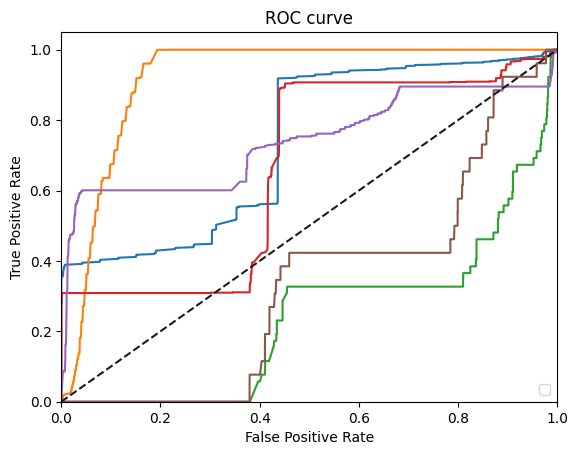

In [233]:
# Plot the LDA model

plot_roc_auc(fit_logit, X_train, y_train) 

<!-- END QUESTION -->

## Question 3e

Complete the function below to create a plot of accuracy vs k-fold by using the results obtained by function call `kfold_cv` function call for a particular model.


<!-- BEGIN QUESTION -->



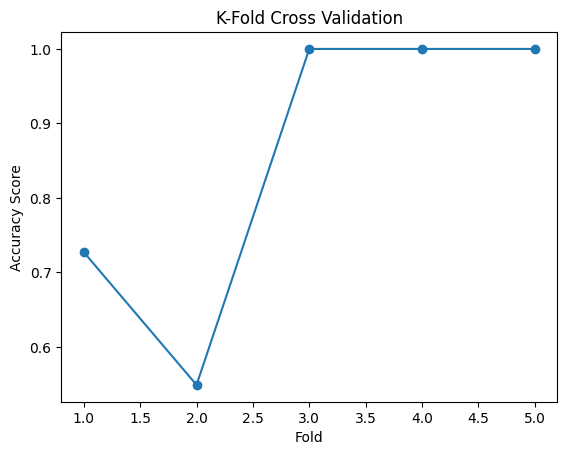

In [236]:
def plot_acc(scores):
    """Creates a plot of accuracy vs k-fold. Returns: None"""
    folds=range(1,len(scores)+1)
    plt.plot(folds, scores,marker='o' )
    plt.xlabel("Fold")
    plt.ylabel("Accuracy Score")
    plt.title("K-Fold Cross Validation")
    plt.draw()

# plot the results

plot_acc(k_accuracy_lda)

<!-- END QUESTION -->

## Question 4a

Suppose we estimate the regression coefficients in a linear regression
model by minimizing:

$\sum_{i=1}^{n} ( y_i - \beta_0  - \sum_{j=1}^{p} \beta_j x_{ij} )^2  + \lambda \sum_{j=1}^{p} \beta_j^2$

for a particular value of $\lambda$. For parts (a) through (e), indicate which of i. through v. is correct. Justify your answer.

(a) As we increase λ from 0, the training RSS will:

    i. Increase initially, and then eventually start decreasing in an inverted U shape.
    ii. Decrease initially, and then eventually start increasing in a U shape.
    iii. Steadily increase.
    iv. Steadily decrease.
    v. Remain constant.

(b) Repeat (a) for test RSS.

(c) Repeat (a) for variance.

(d) Repeat (a) for (squared) bias.

(e) Repeat (a) for the irreducible error.


_Type your answer here, replacing this text._

<!-- END QUESTION -->

## Question 4b

Now, we will predict the number of applications received using the other variables in the College data set (URL = train_data_original= pd.read_csv('https://raw.githubusercontent.com/sukhjitsehra/datasets/refs/heads/master/CP322/College.csv') )

a) Load the dataset; create a dummy variable for `Private` column and name it as `Private_Yes`; and then drop variables: `'Unnamed: 0','Apps','Private'` .

b) Split the data set into a training set and a test set (70/30 split) using random_state=RANDOM_STATE (i.e. 42).  Fit a linear model using least squares on the training set, and report the test error obtained.

c) Fit a ridge regression model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained.

d) Fit a lasso model on the training set, with $\lambda$ chosen by cross-validation. Report the test error obtained, along with the number of non-zero coefficient estimates.


In [239]:
#a) 
# Load data set
college = pd.read_csv('https://raw.githubusercontent.com/sukhjitsehra/datasets/master/CP322/College.csv')

# create dummy variable; drop unwanted variables; separate predictors and target variables
dummies = pd.get_dummies(college[['Private']]) # SEE
college["Private_Yes"] = dummies["Private_Yes"]
X = college.drop(columns=["Unnamed: 0", 'Apps', 'Private'])
y= college['Apps']

# b) 
# split into train/test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=RANDOM_STATE)

# fit regression model
fit_lr = LinearRegression()
fit_lr.fit(X_train, y_train)


#  get accuracy
lr_error = metrics.mean_squared_error(y_test, fit_lr.predict(X_test))

print(lr_error)


# c)
# create a grid for search
alpha = 10**np.linspace(4,-2,100)

# define the model (use alphas=alpha, cv=10, normalize=True)  and fit the model using X_train and y_train
fit_rcv = RidgeCV(alphas=alpha, cv=10)
fit_rcv.fit(X_train, y_train)

# get accuracy and value of alpha
rcv_error = metrics.mean_squared_error(y_test, fit_rcv.predict(X_test))

print(rcv_error)

print(fit_rcv.alpha_)

# d)
# use the same grid as created above to define the model (use alphas=alpha, cv=10) and fit the model

fit_lcv = LassoCV(alphas=alpha, cv=10, random_state=RANDOM_STATE)
fit_lcv.fit(X_train, y_train) #
# get accuracy and value of alpha
lcv_error = metrics.mean_squared_error(y_test, fit_lcv.predict(X_test))

print(lcv_error)

print(fit_lcv.alpha_)

1931803.1942070273
1926042.3435302556
12.32846739442066
1930737.4633042654
2.009233002565046
